In [1]:
import torch
from torch import nn
import torchvision
import torchlens as tl
from importlib import reload
from os.path import join as opj

out_dir = opj("/home/jtaylor/projects/torchlens/tests/example_visuals")

Example Networks and Code

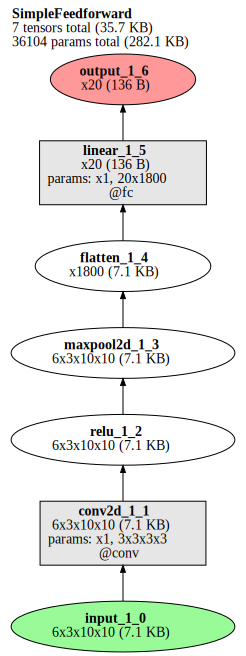

Log of SimpleFeedforward forward pass:
	Model structure: purely feedforward, without branching; 2 total modules.
	7 tensors (35.7 KB) computed in forward pass; 7 tensors (35.7 KB) saved.
	4 parameter operations (36104 params total; 282.1 KB).
	Random seed: 2787769754
	Time elapsed: 0.013s
	Module Hierarchy:
		conv
		fc
	Layers:
		0: input_1_0 
		1: conv2d_1_1 
		2: relu_1_2 
		3: maxpool2d_1_3 
		4: flatten_1_4 
		5: linear_1_5 
		6: output_1_6 
Layer linear_1_5, operation 6/7:
	Output tensor: shape=(20,), dype=torch.float32, size=136 B
		tensor([-0.1019,  0.6668,  0.0629,  0.2558, -0.0316])...
	Params: Computed from params with shape (20,), (20, 1800); 36020 params total (140.8 KB)
	Parent Layers: flatten_1_4
	Child Layers: output_1_6
	Function: linear (gradfunc=AddBackward0) 
	Computed inside module: fc
	Time elapsed:  1.628E-04s
	Output of modules: fc
	Output of bottom-level module: fc
	Lookup keys: -2, 5, fc, fc:1, linear_1_5, linear_1_5:1


In [42]:
class SimpleFeedforward(nn.Module):
    def __init__(self):
        """Conv, relu, pool, fc, output.

        """
        super().__init__()
        self.conv = nn.Conv2d(3, 3, 3, padding=1)
        self.fc = nn.Linear(1800, 20)
        self.identity = nn.Identity()

    def forward(self, x):
        x = self.conv(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 1)
        x = x.flatten()
        x = self.fc(x)
        return x


simple_ff = SimpleFeedforward()
name = 'simple_ff'
x = torch.randn(6, 3, 10, 10)
model_history = tl.get_model_activations(simple_ff, x, vis_opt='unrolled', vis_outpath=opj(out_dir, name))
print(model_history)
print(model_history['linear_1_5'])


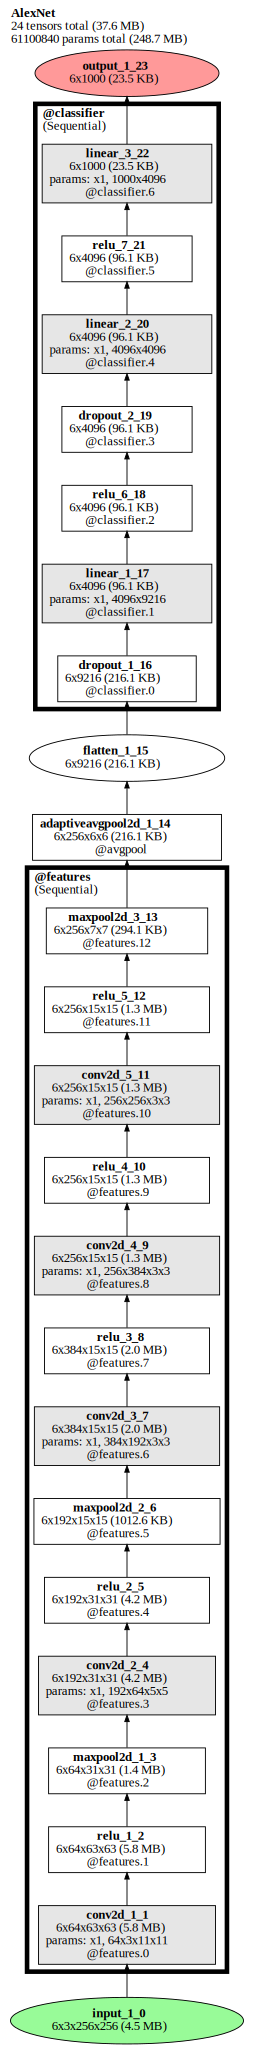

Log of AlexNet forward pass:
	Model structure: purely feedforward, without branching; 8 total modules.
	24 tensors (37.6 MB) computed in forward pass; 8 tensors (15.0 MB) saved.
	16 parameter operations (61100840 params total; 248.7 MB).
	Random seed: 244516003
	Time elapsed: 0.146s
	Module Hierarchy:
		features:
		    features.0, features.1, features.2, features.3, features.4, features.5, features.6, features.7, 
		    features.8, features.9, features.10, features.11, features.12
		avgpool
		classifier:
		    classifier.0, classifier.1, classifier.2, classifier.3, classifier.4, classifier.5, classifier.6
	Layers:
		0: conv2d_1_1 
		1: conv2d_2_4 
		2: conv2d_3_7 
		3: conv2d_4_9 
		4: conv2d_5_11 
		5: flatten_1_15 
		6: linear_2_20 
		7: linear_3_22 
tensor([[[[ 4.7323e-03, -1.8036e-03,  9.8458e-03,  ...,  6.5410e-03,
            6.3605e-03,  6.2320e-03],
          [ 1.7961e-02,  7.2984e-03,  1.3715e-02,  ...,  1.5181e-02,
            5.0849e-03,  4.1303e-03],
          [ 1.7987e-02,

In [21]:
alexnet = torchvision.models.alexnet()
name = 'alexnet'
x = torch.rand(6, 3, 256, 256)
model_history = tl.get_model_activations(alexnet, x, vis_opt='unrolled',
                                         which_layers=['conv', 'classifier', 'flatten_1_15', 'linear_2_20'],
                                         vis_outpath=opj(out_dir, name))
print(model_history)
print(model_history['conv2d_5_11'].tensor_contents)

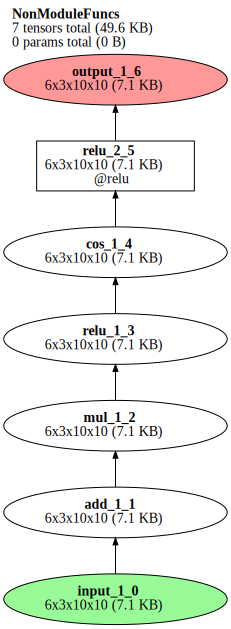

Layer add_1_1, operation 2/7:
	Output tensor: shape=(6, 3, 10, 10), dype=torch.float32, size=7.1 KB
		tensor([[ 0.1559,  0.6678,  2.1725,  0.3042,  1.1185],
        [ 3.3502,  2.8413,  0.6407, -0.0392,  1.3021],
        [-0.2880,  0.8749,  1.5383,  0.3054,  1.2144],
        [-1.4642,  0.3934,  3.1030,  1.1507,  0.5046],
        [ 0.2217, -0.0965,  1.2450,  0.0331,  0.3119]])...
	Params: no params used
	Parent Layers: input_1_0
	Child Layers: mul_1_2
	Function: __add__ (gradfunc=AddBackward0) 
	Computed inside module: not computed inside a module
	Time elapsed:  9.394E-05s
	Output of modules: none
	Lookup keys: -6, 1, add_1_1, add_1_1:1
Layer relu_1_3, operation 4/7:
	Output tensor: shape=(6, 3, 10, 10), dype=torch.float32, size=7.1 KB
		tensor([[0.3119, 1.3356, 4.3449, 0.6085, 2.2369],
        [6.7004, 5.6827, 1.2814, 0.0000, 2.6041],
        [0.0000, 1.7497, 3.0765, 0.6108, 2.4289],
        [0.0000, 0.7869, 6.2061, 2.3014, 1.0093],
        [0.4433, 0.0000, 2.4900, 0.0662, 0.6238]])...

In [8]:
class NonModuleFuncs(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x + 1
        x = x * 2
        x = nn.functional.relu(x)
        x = torch.cos(x)
        x = self.relu(x)
        return x


non_module_funcs_network = NonModuleFuncs()
name = 'NonModuleFuncs'
x = torch.randn(6, 3, 10, 10)
x.requires_grad = True
model_history = tl.get_model_activations(non_module_funcs_network, x, vis_opt='unrolled',
                                         vis_outpath=opj(out_dir, name))
print(model_history['add_1_1'])
print(model_history['relu_1_3'])
print(model_history['relu_2_5'])


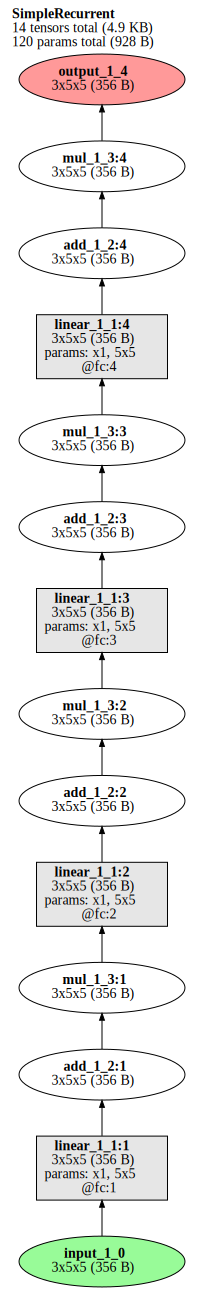

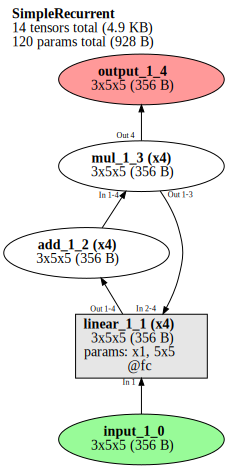

Log of SimpleRecurrent forward pass:
	Model structure: recurrent (at most 4 loops), without branching; 1 total modules.
	14 tensors (4.9 KB) computed in forward pass; 14 tensors (4.9 KB) saved.
	8 parameter operations (120 params total; 928 B).
	Random seed: 3704911992
	Time elapsed: 0.015s
	Module Hierarchy:
		fc
		fc
		fc
		fc
	Layers:
		0: input_1_0 
		1: linear_1_1:1  (1/4 passes)
		2: add_1_2:1  (1/4 passes)
		3: mul_1_3:1  (1/4 passes)
		4: linear_1_1:2  (2/4 passes)
		5: add_1_2:2  (2/4 passes)
		6: mul_1_3:2  (2/4 passes)
		7: linear_1_1:3  (3/4 passes)
		8: add_1_2:3  (3/4 passes)
		9: mul_1_3:3  (3/4 passes)
		10: linear_1_1:4  (4/4 passes)
		11: add_1_2:4  (4/4 passes)
		12: mul_1_3:4  (4/4 passes)
		13: output_1_4 
Layer linear_1_1 (pass 3/4), operation 8/14:
	Output tensor: shape=(3, 5, 5), dype=torch.float32, size=356 B
		tensor([[ 3.4173, -2.5425, -1.4266,  1.2129,  0.4290],
        [ 1.2821, -3.1219, -2.9983,  1.2673,  0.7662],
        [ 1.9542, -1.3964, -1.5583, -1.710

In [2]:
class SimpleRecurrent(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(in_features=5, out_features=5)

    def forward(self, x):
        for r in range(4):
            x = self.fc(x)
            x = x + 1
            x = x * 2
        return x


recurrent_model = SimpleRecurrent()
name = 'simple_recurrent'
x = torch.randn(3, 5, 5)
x.requires_grad = True
model_history = tl.get_model_activations(recurrent_model, x, vis_opt='unrolled',
                                         vis_outpath=opj(out_dir, name + 'unrolled'))
model_history = tl.get_model_activations(recurrent_model, x, vis_opt='rolled',
                                         vis_outpath=opj(out_dir, name + 'rolled'))
print(model_history)
print(model_history['linear_1_1:3'])

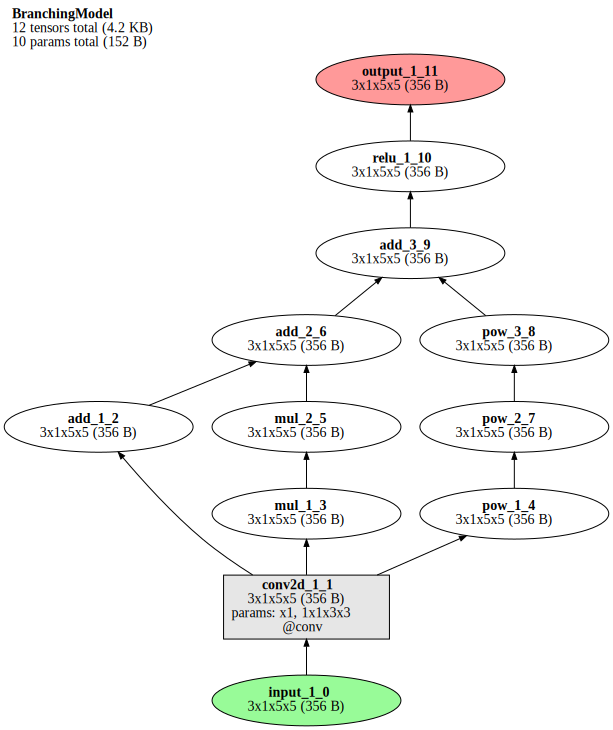

Log of BranchingModel forward pass:
	Model structure: purely feedforward, with branching; 1 total modules.
	12 tensors (4.2 KB) computed in forward pass; 12 tensors (4.2 KB) saved.
	2 parameter operations (10 params total; 152 B).
	Random seed: 1640360536
	Time elapsed: 0.011s
	Module Hierarchy:
		conv
	Layers:
		0: input_1_0 
		1: conv2d_1_1 
		2: add_1_2 
		3: mul_1_3 
		4: pow_1_4 
		5: mul_2_5 
		6: add_2_6 
		7: pow_2_7 
		8: pow_3_8 
		9: add_3_9 
		10: relu_1_10 
		11: output_1_11 


In [6]:
class BranchingModel(nn.Module):
    def __init__(self):
        """Conv, relu, pool, fc, output.

        """
        super().__init__()
        self.conv = nn.Conv2d(1, 1, 3, padding=1)

    def forward(self, x):
        x = self.conv(x)
        a = x + 1
        b = x * 2
        b = b * 3
        c = x ** 2
        c = c ** 3
        c = c ** 4
        x = a + b + c
        x = nn.functional.relu(x)
        return x


torchvision.models.resnet101
name = 'branching_model'
x = torch.randn(3, 1, 5, 5)
x.requires_grad = True
branching_model = BranchingModel()
model_history = tl.get_model_activations(branching_model, x, vis_opt='unrolled',
                                         vis_outpath=opj(out_dir, name))
print(model_history)

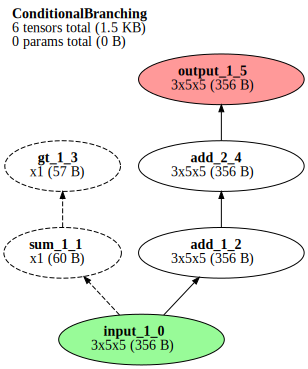

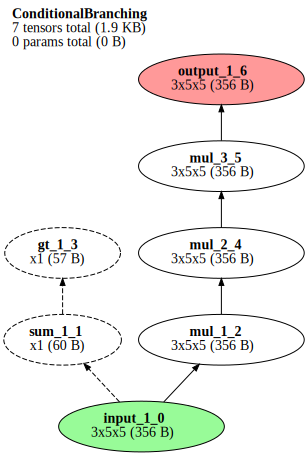

In [11]:
class ConditionalBranching(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        if torch.sum(x) > 0:
            x = x + 1
            x = x + 1
        else:
            x = x * 2
            x = x * 2
            x = x * 2
        return x


conditional_model = ConditionalBranching()
name = 'conditional_model'
x.requires_grad = True
ones = torch.ones(3, 5, 5)
model_history = tl.get_model_activations(conditional_model, ones, vis_opt='unrolled',
                                         vis_outpath=opj(out_dir, name + '_ones'))
zeros = torch.zeros(3, 5, 5)
model_history = tl.get_model_activations(conditional_model, zeros, vis_opt='unrolled',
                                         vis_outpath=opj(out_dir, name + '_zeros'))

Make the PDFs


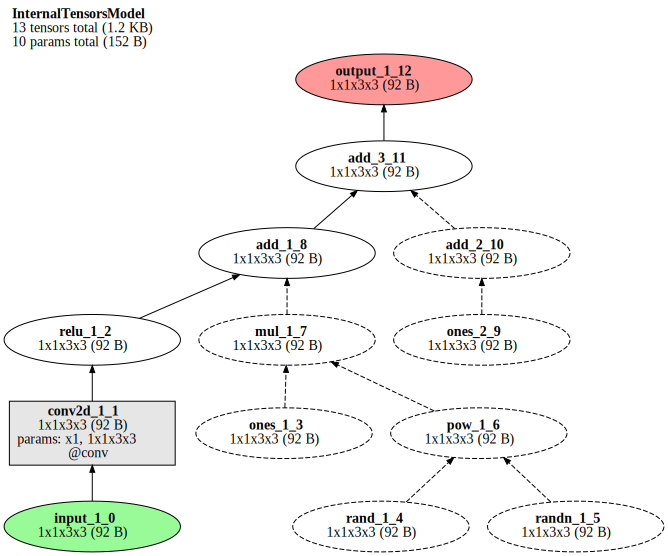

In [21]:
class InternalTensorsModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 1, 3, padding=1)

    def forward(self, x):
        x = self.conv(x)
        x = nn.functional.relu(x)
        x = x + torch.ones(1, 1, 3, 3) * torch.rand(1, 1, 3, 3) ** torch.randn(1, 1, 3, 3)
        y = torch.ones(1, 1, 3, 3)
        y = y + 1
        z = x + y
        return z


internal_tensors = InternalTensorsModel()
name = 'internal_tensors'
x.requires_grad = True
x = torch.rand(1, 1, 3, 3)
model_history = tl.get_model_activations(internal_tensors, x, vis_opt='unrolled',
                                         vis_outpath=opj(out_dir, name))


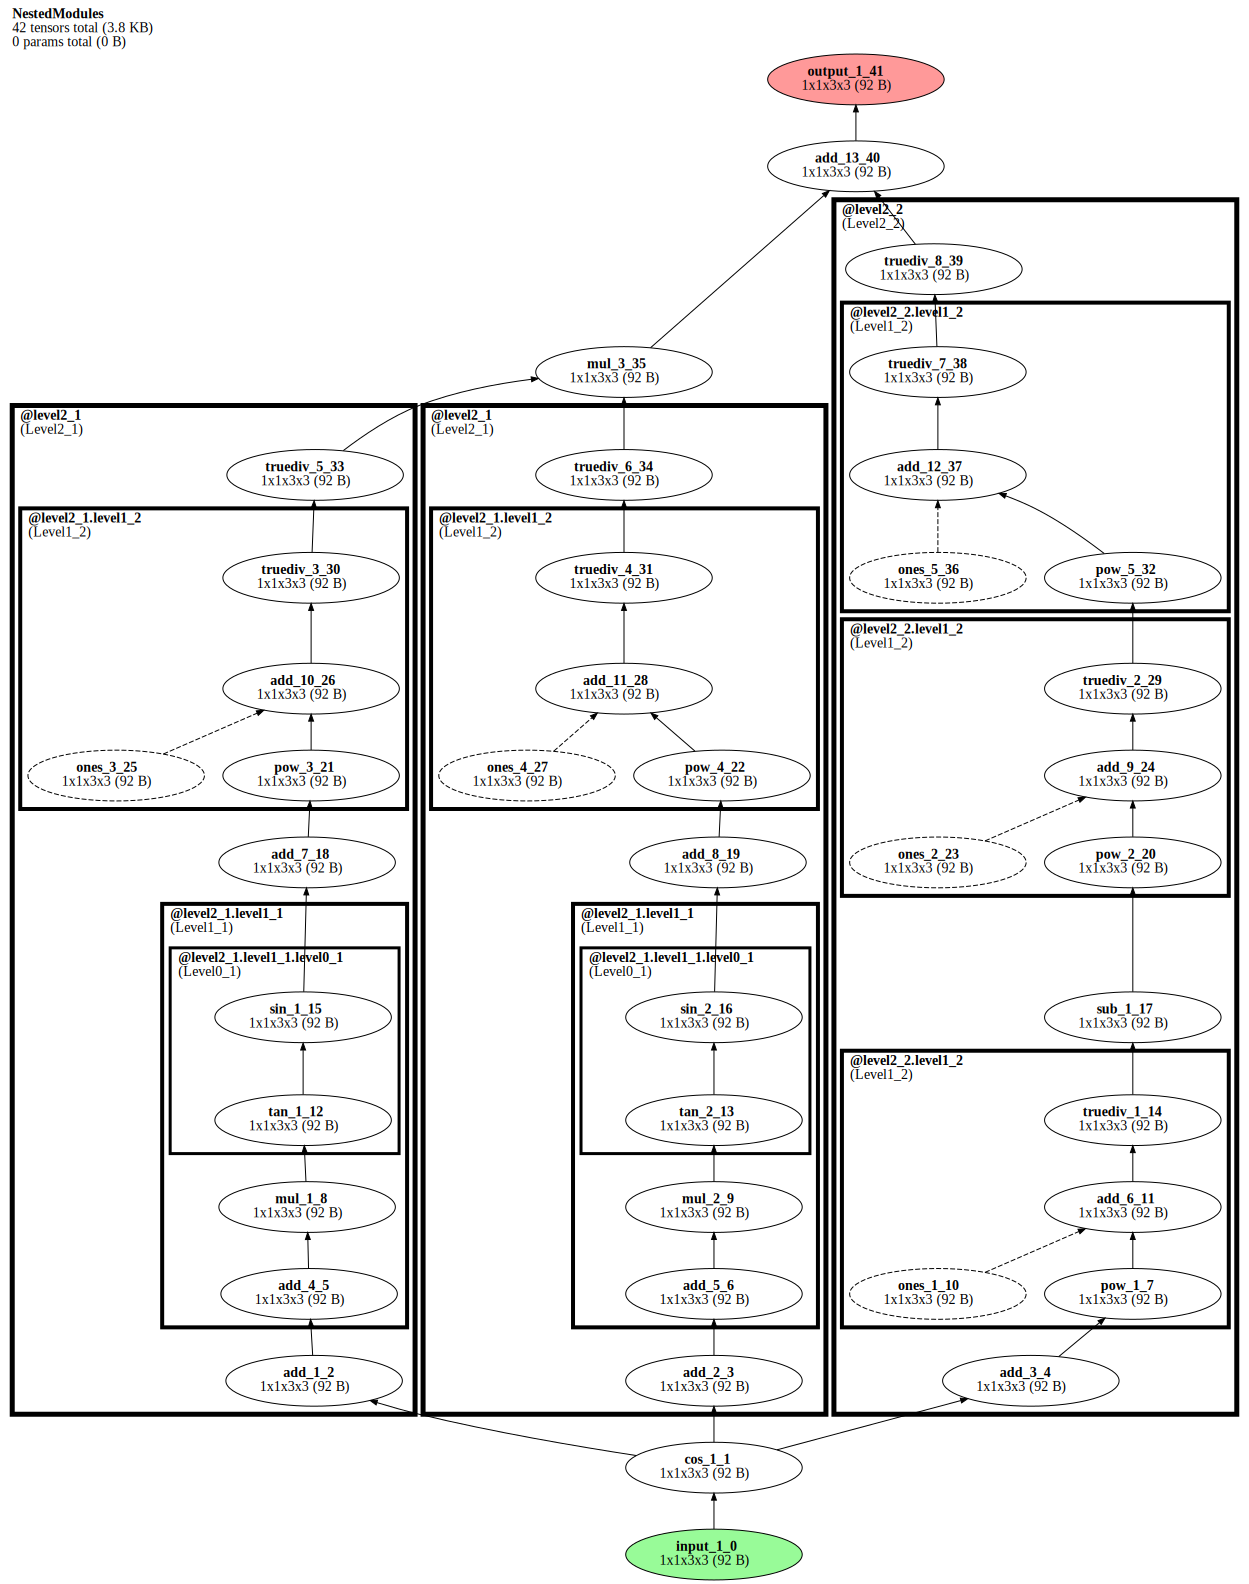

In [24]:
class Level0_1(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x = torch.tan(x)
        x = torch.sin(x)
        return x


class Level1_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.level0_1 = Level0_1()

    def forward(self, x):
        x = x + 1
        x = x * 2
        x = self.level0_1(x)
        return x


class Level1_2(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        x = x ** 3 + torch.ones(x.shape)
        x = x / 5
        return x


class Level2_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.level1_1 = Level1_1()
        self.level1_2 = Level1_2()

    def forward(self, x):
        x = x + 1
        x = self.level1_1(x)
        x = x + 9
        x = self.level1_2(x)
        x = x / 5
        return x


class Level2_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.level1_1 = Level1_1()
        self.level1_2 = Level1_2()

    def forward(self, x):
        x = x + 9
        x = self.level1_2(x)
        x = x - 5
        x = self.level1_2(self.level1_2(x))
        x = x / 5
        return x


class NestedModules(nn.Module):
    def __init__(self):
        super().__init__()
        self.level2_1 = Level2_1()
        self.level2_2 = Level2_2()

    def forward(self, x):
        x = torch.cos(x)
        x1 = self.level2_1(x)
        x2 = self.level2_1(x)
        x3 = self.level2_2(x)
        x = x1 * x2 + x3
        return x


nested_modules = NestedModules()
name = 'nested_modules'
x.requires_grad = True
x = torch.rand(1, 1, 3, 3)
model_history = tl.get_model_activations(nested_modules, x, vis_opt='unrolled',
                                         vis_outpath=opj(out_dir, name))


In [31]:
alexnet = torchvision.models.alexnet()
x = torch.rand(6, 3, 256, 256)
model_history = tl.get_model_activations(alexnet, x, vis_opt='none')
print(model_history['maxpool2d_3_13'])  # can pull out a layer by its name
print(model_history['features.12'])  # or the module it came out of
print(model_history['features'])  # ...at any level of module nesting
print(model_history[13])  # can also index by layer's ordinal position
print(model_history[-11])  # ...just like a list


Layer maxpool2d_3_13, operation 14/24:
	Output tensor: shape=(6, 256, 7, 7), dype=torch.float32, size=294.1 KB
		tensor([[0.0134, 0.0053, 0.0060, 0.0060, 0.0023],
        [0.0100, 0.0023, 0.0060, 0.0060, 0.0053],
        [0.0085, 0.0028, 0.0043, 0.0036, 0.0053],
        [0.0096, 0.0061, 0.0061, 0.0048, 0.0048],
        [0.0086, 0.0061, 0.0061, 0.0048, 0.0062]])...
	Params: no params used
	Parent Layers: relu_5_12
	Child Layers: adaptiveavgpool2d_1_14
	Function: max_pool2d (gradfunc=MaxPool2DWithIndicesBackward) 
	Computed inside module: features.12
	Time elapsed:  2.949E-04s
	Output of modules: features.12, features
	Output of bottom-level module: features.12
	Lookup keys: -11, 13, features, features.12, features.12:1, features:1, maxpool2d_3_13, maxpool2d_3_13:1
Layer maxpool2d_3_13, operation 14/24:
	Output tensor: shape=(6, 256, 7, 7), dype=torch.float32, size=294.1 KB
		tensor([[0.0134, 0.0053, 0.0060, 0.0060, 0.0023],
        [0.0100, 0.0023, 0.0060, 0.0060, 0.0053],
        [0.00

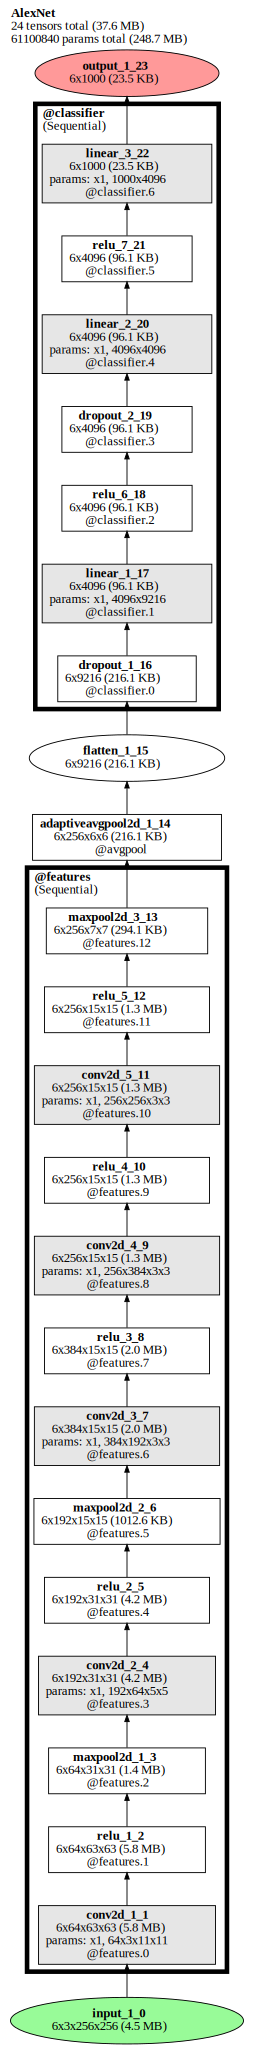

Log of AlexNet forward pass:
	Model structure: purely feedforward, without branching; 9 total modules.
	24 tensors (37.6 MB) computed in forward pass; 9 tensors (16.4 MB) saved.
	16 parameter operations (61100840 params total; 248.7 MB).
	Random seed: 1405604357
	Time elapsed: 0.151s
	Module Hierarchy:
		features:
		    features.0, features.1, features.2, features.3, features.4, features.5, features.6, features.7, 
		    features.8, features.9, features.10, features.11, features.12
		avgpool
		classifier:
		    classifier.0, classifier.1, classifier.2, classifier.3, classifier.4, classifier.5, classifier.6
	Layers:
		0: conv2d_1_1 
		1: maxpool2d_1_3 
		2: conv2d_2_4 
		3: conv2d_3_7 
		4: conv2d_4_9 
		5: conv2d_5_11 
		6: flatten_1_15 
		7: linear_2_20 
		8: linear_3_22 


In [32]:
alexnet = torchvision.models.alexnet()
x = torch.rand(6, 3, 256, 256)
model_history = tl.get_model_activations(alexnet, x, vis_opt='unrolled',
                                         which_layers=['conv',
                                                       'classifier',
                                                       'features.2',
                                                       'flatten_1_15',
                                                       'linear_2_20'])
print(model_history)


/home/jtaylor/anaconda3/envs/py39/lib/python3.9/site-packages/torchvision/models/googlenet.py:77: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn('The default weight initialization of GoogleNet will be changed in future releases of '


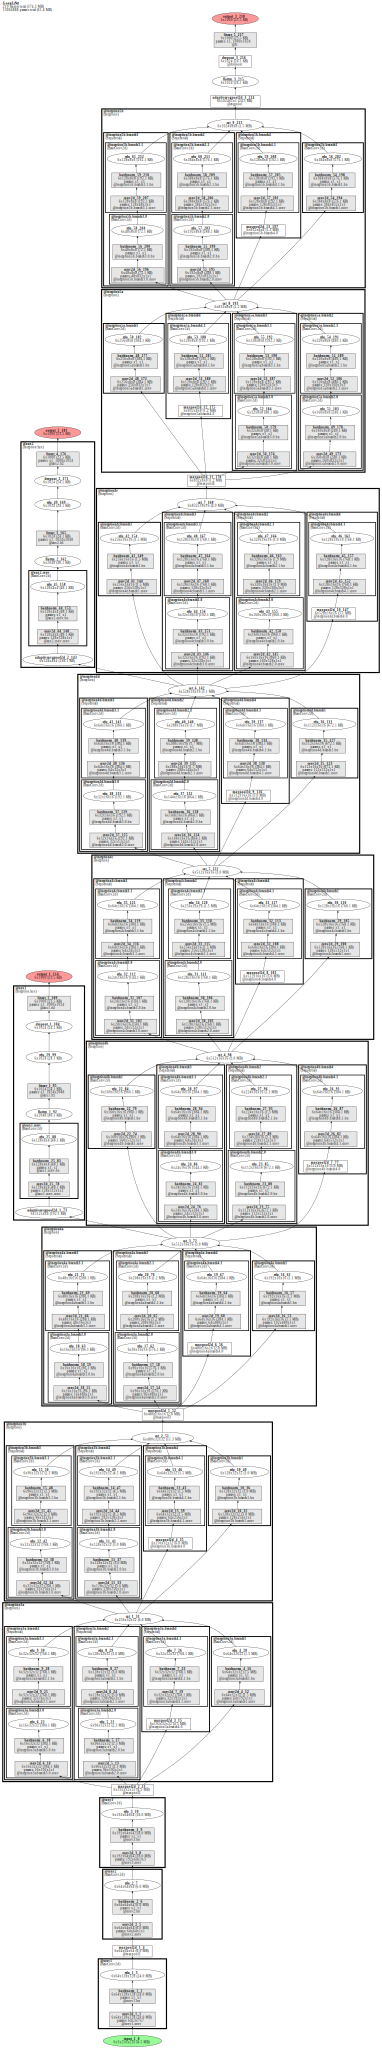

In [34]:
googlenet = torchvision.models.googlenet()
x = torch.rand(6, 3, 256, 256)
model_history = tl.get_model_activations(googlenet, x, vis_opt='unrolled', vis_outpath=opj(out_dir, 'googlenet'))


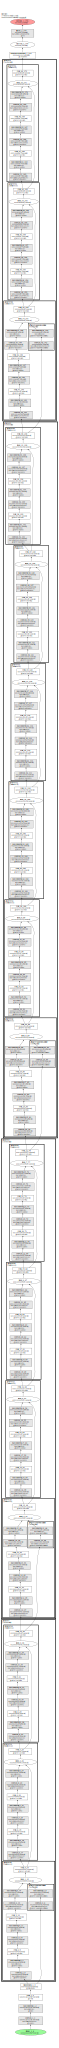

In [35]:
resnet = torchvision.models.resnet50()
x = torch.rand(6, 3, 256, 256)
model_history = tl.get_model_activations(resnet, x, vis_opt='unrolled', vis_outpath=opj(out_dir, 'resnet50'))

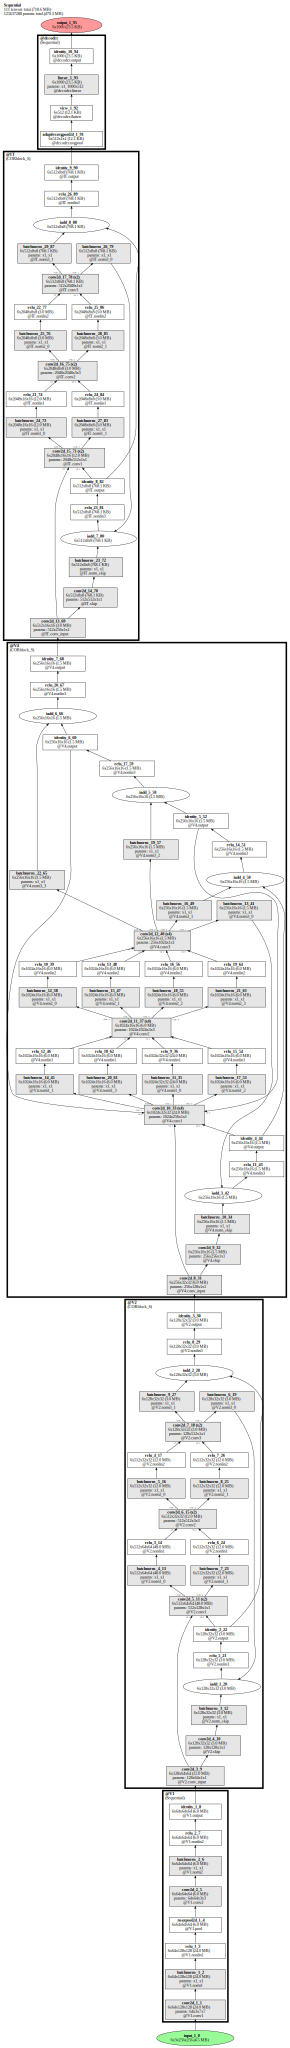

In [37]:
from cornet import cornet_s

cornet_model = cornet_s()
x = torch.rand(6, 3, 256, 256)
model_history = tl.get_model_activations(cornet_model, x, vis_opt='rolled', vis_outpath=opj(out_dir, 'cornet_s'))


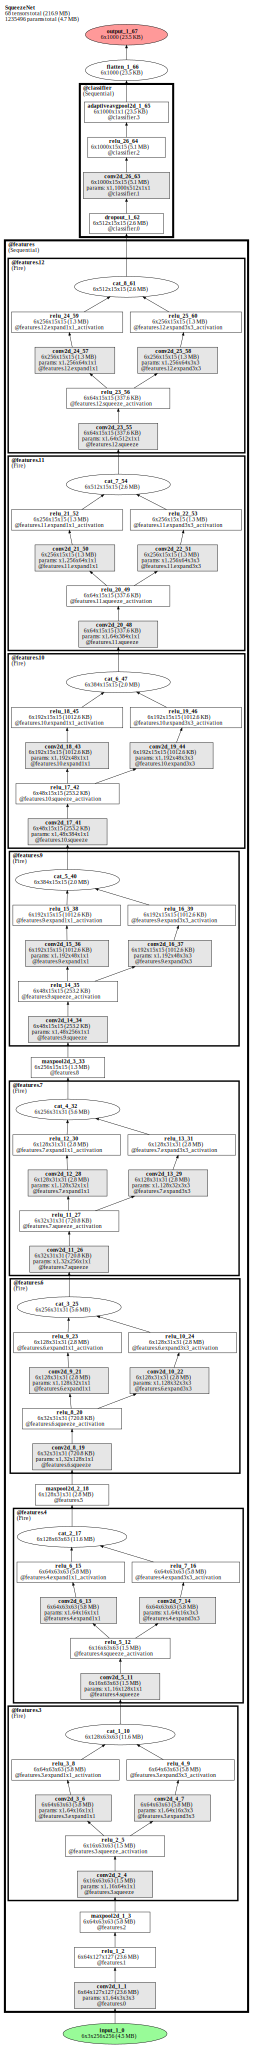

In [38]:
squeezenet = torchvision.models.squeezenet1_1()
x = torch.rand(6, 3, 256, 256)
model_history = tl.get_model_activations(squeezenet, x, vis_opt='unrolled', vis_outpath=opj(out_dir, 'squeezenet'))


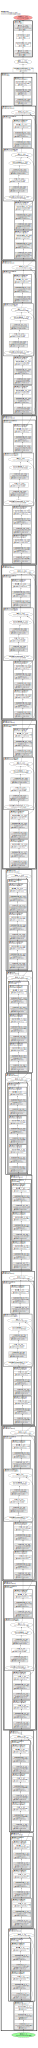

In [39]:
mobilnet = torchvision.models.mobilenet_v3_large()
x = torch.rand(6, 3, 256, 256)
model_history = tl.get_model_activations(mobilnet, x, vis_opt='unrolled', vis_outpath=opj(out_dir, 'mobilnet'))


In [40]:
resnext = torchvision.models.resnext101_32x8d()
x = torch.rand(6, 3, 256, 256)
model_history = tl.get_model_activations(resnext, x, vis_opt='unrolled', vis_outpath=opj(out_dir, 'resnext'))


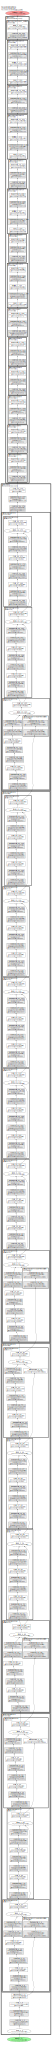

In [41]:
import visualpriors

taskonomy_model = visualpriors.taskonomy_network.TaskonomyNetwork()
x = torch.rand(6, 3, 256, 256)
tl.show_model_graph(taskonomy_model, x, vis_opt='unrolled', vis_outpath=opj(out_dir, 'taskonomy'))
